# Exports Database - Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
countries = pd.read_csv('../raw_data/CountryCodes.csv', encoding = 'unicode_escape')
countries.rename({'Alpha_2_code':'partner'}, axis=1, inplace=True)
countries.dropna(inplace=True)
countries.head()

,Country,partner,Alpha_3_code,Numeric
0,Afghanistan,AF,AFG,4.0
1,Albania,AL,ALB,8.0
2,Algeria,DZ,DZA,12.0
3,American Samoa,AS,ASM,16.0
4,Andorra,AD,AND,20.0


In [3]:
EU_countries = pd.DataFrame.from_dict([{'Belgium': 'BE', 'Bulgaria': 'BG', 'Czechia': 'CZ', 'Denmark': 'DK', 'Germany': 'DE', 'Estonia': 'EE', 'Ireland': 'IE', 'Greece': 'EL',
                                        'Spain': 'ES', 'France': 'FR', 'Croatia': 'HR', 'Italy': 'IT', 'Cyprus': 'CY', 'Latvia': 'LV', 'Lithuania': 'LT', 'Luxembourg': 'LU', 
                                        'Hungary': 'HU', 'Malta': 'MT', 'Netherlands': 'NL', 'Austria': 'AT', 'Poland': 'PL', 'Portugal': 'PT', 'Romania': 'RO', 'Slovenia': 'SI',
                                        'Slovakia': 'SK', 'Finland': 'FI', 'Sweden': 'SE'}])
EU_countries = EU_countries.T.reset_index()
EU_countries.rename(columns={'index': 'EU_country', 0: 'Alpha_2_code'}, inplace=True)
EU_countries.set_index('Alpha_2_code', inplace=True)
EU_countries

,EU_country
Alpha_2_code,
BE,Belgium
BG,Bulgaria
CZ,Czechia
DK,Denmark
DE,Germany
EE,Estonia
IE,Ireland
EL,Greece
ES,Spain


In [4]:
temp = pd.read_csv('../raw_data/Exports_Cleaned.csv')
temp

,Unnamed: 0,freq,siec,partner,unit,Country,EU?,Alpha_2_code,Alpha_3_code,1990,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,A,E7000,AD,GWH,Albania,False,AL,ALB,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
1,1,A,E7000,AD,GWH,Austria,True,AT,AUT,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
2,2,A,E7000,AD,GWH,Bosnia and Herzegovina,False,BA,BIH,:,...,:,:,:,0.0,0.0,0.000,0.000,0.000,0.000,0.000
3,3,A,E7000,AD,GWH,Belgium,True,BE,BEL,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
4,4,A,E7000,AD,GWH,Bulgaria,True,BG,BGR,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14185,14185,A,H8000,ZA,TJ,Slovakia,True,SK,SVK,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
14186,14186,A,H8000,ZA,TJ,Turkey,False,TR,TUR,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
14187,14187,A,H8000,ZA,TJ,Ukraine,False,UA,UKR,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
14188,14188,A,H8000,ZA,TJ,United Kingdom,False,UK,GBR,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,:


# Remove uncessary values

In [5]:
temp.drop(columns=['freq', 'Unnamed: 0'], inplace=True)

# Filtering for Electricity

In [6]:
exp = temp[temp['siec']=='E7000']
exports = exp[exp['EU?']==True]
exports

,siec,partner,unit,Country,EU?,Alpha_2_code,Alpha_3_code,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,E7000,AD,GWH,Austria,True,AT,AUT,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
3,E7000,AD,GWH,Belgium,True,BE,BEL,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
4,E7000,AD,GWH,Bulgaria,True,BG,BGR,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
5,E7000,AD,GWH,Cyprus,True,CY,CYP,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
6,E7000,AD,GWH,Czech Republic,True,CZ,CZE,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,E7000,ZA,GWH,Portugal,True,PT,PRT,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
7086,E7000,ZA,GWH,Romania,True,RO,ROU,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
7088,E7000,ZA,GWH,Sweden,True,SE,SWE,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
7089,E7000,ZA,GWH,Slovenia,True,SI,SVN,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000


In [7]:
exports = exports.merge(countries, on='partner', how='left')


In [8]:
exports.rename({'Country_y':'Partner_country', 'Country_x': 'Country', 'Alpha_3_code_x':'Alpha_3_code'}, axis=1, inplace=True)


In [9]:
exports

,siec,partner,unit,Country,EU?,Alpha_2_code,Alpha_3_code,1990,1991,1992,...,2014,2015,2016,2017,2018,2019,2020,Partner_country,Alpha_3_code_y,Numeric
0,E7000,AD,GWH,Austria,True,AT,AUT,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,Andorra,AND,20.0
1,E7000,AD,GWH,Belgium,True,BE,BEL,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,Andorra,AND,20.0
2,E7000,AD,GWH,Bulgaria,True,BG,BGR,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,Andorra,AND,20.0
3,E7000,AD,GWH,Cyprus,True,CY,CYP,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,Andorra,AND,20.0
4,E7000,AD,GWH,Czech Republic,True,CZ,CZE,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,Andorra,AND,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,E7000,ZA,GWH,Portugal,True,PT,PRT,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,South Africa,ZAF,710.0
4451,E7000,ZA,GWH,Romania,True,RO,ROU,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,South Africa,ZAF,710.0
4452,E7000,ZA,GWH,Sweden,True,SE,SWE,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,South Africa,ZAF,710.0
4453,E7000,ZA,GWH,Slovenia,True,SI,SVN,0.000,0.000,0.000,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,South Africa,ZAF,710.0


In [10]:
exports.drop(columns=['siec', 'EU?', 'Alpha_3_code_y', 'Numeric'], inplace=True)

In [11]:
exports = exports[['partner', 'Partner_country', 'unit', 'Country', 'Alpha_2_code', 'Alpha_3_code',
                   '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
                   '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
                   '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
                   '2017', '2018', '2019', '2020']]

In [12]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):  # more options can be specified also
    display(exports)

,partner,Partner_country,unit,Country,Alpha_2_code,Alpha_3_code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AD,Andorra,GWH,Austria,AT,AUT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
1,AD,Andorra,GWH,Belgium,BE,BEL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
2,AD,Andorra,GWH,Bulgaria,BG,BGR,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
3,AD,Andorra,GWH,Cyprus,CY,CYP,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
4,AD,Andorra,GWH,Czech Republic,CZ,CZE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,ZA,South Africa,GWH,Portugal,PT,PRT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
4451,ZA,South Africa,GWH,Romania,RO,ROU,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
4452,ZA,South Africa,GWH,Sweden,SE,SWE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
4453,ZA,South Africa,GWH,Slovenia,SI,SVN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000


In [13]:
years = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
         '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
         '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
         '2017', '2018', '2019', '2020']
for year in years:
    exports[year] = pd.to_numeric(exports[year], errors='raise', downcast='float')
    
exports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 0 to 4454
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   partner          4428 non-null   object 
 1   Partner_country  4131 non-null   object 
 2   unit             4455 non-null   object 
 3   Country          4290 non-null   object 
 4   Alpha_2_code     4455 non-null   object 
 5   Alpha_3_code     4290 non-null   object 
 6   1990             4455 non-null   float32
 7   1991             4455 non-null   float32
 8   1992             4455 non-null   float32
 9   1993             4455 non-null   float32
 10  1994             4455 non-null   float32
 11  1995             4455 non-null   float32
 12  1996             4455 non-null   float32
 13  1997             4455 non-null   float32
 14  1998             4455 non-null   float32
 15  1999             4455 non-null   float32
 16  2000             4455 non-null   float32
 17  2001          

# Checking for NaN values

In [14]:
(exports.loc[:, '1990':'2020']).isna().sum()

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
dtype: int64

# Exports to EU Countries:
***!!*** Greece is missing

In [15]:
exports_grouped = exports.groupby(by='Country').sum()
exports_grouped

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Austria,14596000.0,15476000.0,17242000.0,17608000.0,18086000.0,19514000.0,16952000.0,19550000.0,20934000.0,27014000.0,...,33554704.0,41253496.0,35378232.0,34874000.0,38655292.0,38413776.0,45633024.0,38258664.0,45836528.0,44653360.0
Belgium,17018000.0,13690000.0,11442000.0,10718000.0,10140000.0,10652000.0,10892000.0,13410000.0,12870000.0,16414000.0,...,21304000.0,13824000.0,15206000.0,8376000.0,5430000.0,16930000.0,16335600.0,8616800.0,29178000.0,28109600.0
Bulgaria,3194000.0,1918000.0,1168000.0,3040000.0,2490000.0,4242000.0,4504000.0,8670000.0,8422000.0,7254000.0,...,24220000.0,21322000.0,19064000.0,27548000.0,29652000.0,21880000.0,18371588.0,20060100.0,17710270.0,14229684.0
Croatia,1280400.0,1918200.0,1280000.0,2924000.0,2974000.0,2608000.0,4530000.0,2452000.0,1986000.0,2666000.0,...,13660000.0,11486000.0,14782000.0,13890000.0,12738000.0,13734000.0,10408400.0,14611600.0,10535600.0,11703400.0
Cyprus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Czech Republic,17742000.0,19448000.0,18384000.0,16112000.0,11720000.0,12608000.0,17628000.0,20402000.0,21688000.0,24516000.0,...,55002000.0,57414000.0,54916000.0,56284000.0,57322000.0,49582000.0,56217872.0,50961008.0,48245632.0,47041824.0
Denmark,9850000.0,10094000.0,9802000.0,10188000.0,13242000.0,9614000.0,38364000.0,22096000.0,15200000.0,14552000.0,...,20748000.0,21412000.0,20754000.0,19694000.0,19466370.0,19838730.0,21310788.0,20818534.0,20342084.0,23422802.0
Estonia,16954000.0,13986000.0,6984000.0,3634000.0,3012000.0,2010000.0,2200000.0,2368000.0,1056000.0,1468000.0,...,10504000.0,9900000.0,12600000.0,12968000.0,12754000.0,11228000.0,10030000.0,9900000.0,5408000.0,7446000.0
Finland,728000.0,1282000.0,1346000.0,858000.0,1260000.0,192000.0,3412000.0,900000.0,552000.0,464000.0,...,7608000.0,3290000.0,3752000.0,7310000.0,10244000.0,6318000.0,3558000.0,5224000.0,7792000.0,13342000.0


<AxesSubplot:>

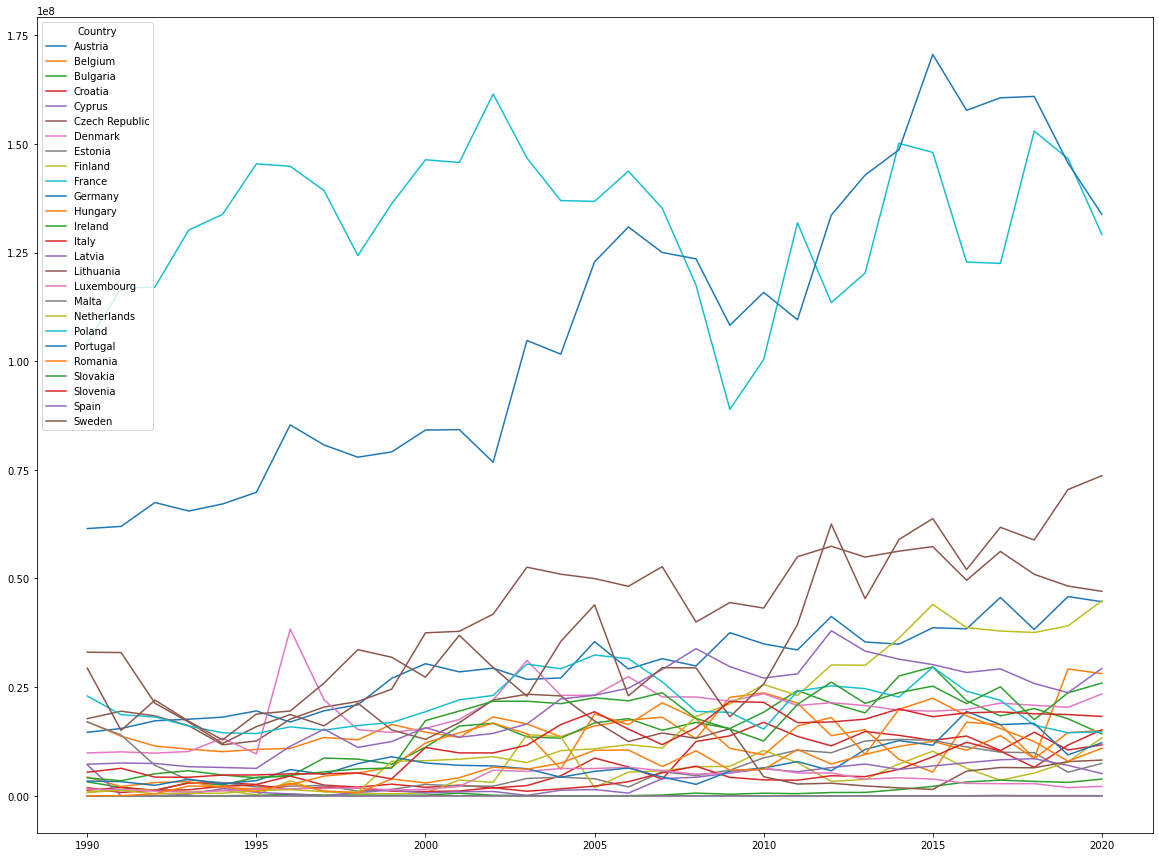

In [16]:
exports_grouped.T.plot(figsize=(20,15))

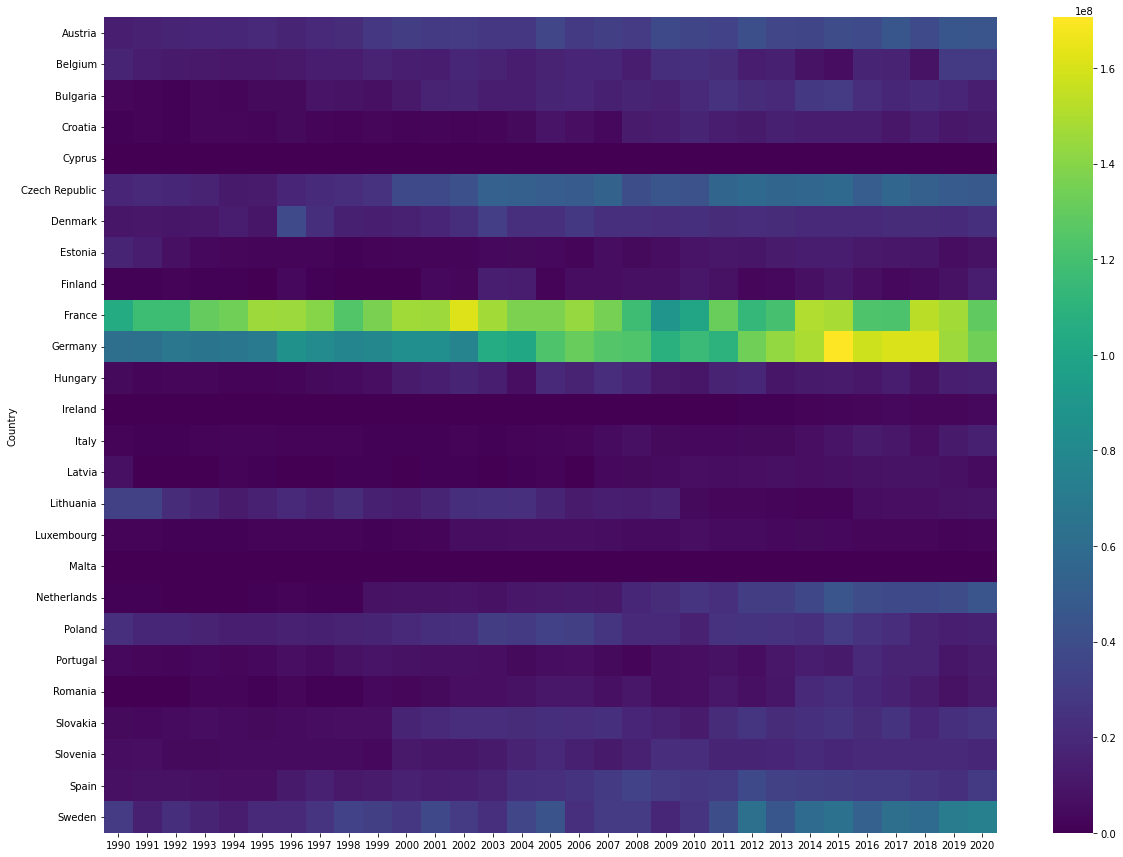

In [17]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(exports_grouped.loc[:, '1990':'2020'], yticklabels=exports_grouped.index.values, cmap="viridis");

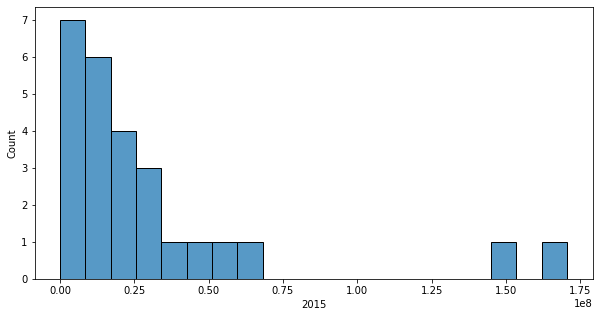

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(exports_grouped['2015'], bins=20);

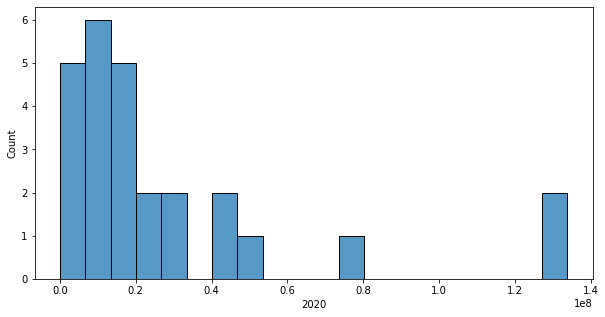

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(exports_grouped['2020'], bins=20);

# Exporters:

In [20]:
exports_grouped_by_partner = exports.groupby(by='Partner_country').sum()
exports_grouped_by_partner = exports_grouped_by_partner.loc[(exports_grouped_by_partner != 0).any(axis=1)]
exports_grouped_by_partner

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Partner_country,,,,,,,,,,,,,,,,,,,,,
Albania,457000.0,648000.0,104000.0,82000.0,157000.0,391000.0,383000.0,537000.0,842000.0,959000.0,...,2125000.0,1480000.0,125000.0,511000.0,806000.0,494000.0,1692000.0,919000.0,790000.0,413000.0
Andorra,196000.0,235000.0,199000.0,224000.0,243000.0,257000.0,249000.0,241000.0,303000.0,279000.0,...,501000.0,511000.0,482000.0,444000.0,476000.0,480000.0,474000.0,443353.0,468759.0,377929.0
Austria,7714000.0,8754000.0,9496000.0,8043000.0,7945000.0,7800000.0,9638000.0,10222000.0,10663000.0,11031000.0,...,27099000.0,26697000.0,27768000.0,28700000.0,32533000.0,27661000.0,29100404.0,27233096.0,25442740.0,23443316.0
Belarus,10395000.0,9698000.0,5479000.0,3949000.0,2000000.0,3337000.0,3586000.0,3651000.0,6226000.0,2974000.0,...,765000.0,1022000.0,893000.0,535000.0,376000.0,681000.0,740700.0,505600.0,389000.0,283300.0
Belgium,2322000.0,3230000.0,2505000.0,4406000.0,4887000.0,6058000.0,5984000.0,6704000.0,4754000.0,6464000.0,...,13314489.0,17052274.0,17439162.0,21827084.0,23744704.0,14769898.0,14221056.0,21702864.0,13695045.0,12909726.0
Bosnia and Herzegovina,180200.0,191100.0,8000.0,782000.0,944000.0,935000.0,1299000.0,1068000.0,569000.0,1157000.0,...,2150000.0,2716000.0,1751000.0,2673000.0,2056000.0,2014000.0,2056000.0,1760400.0,1839800.0,3013000.0
Bulgaria,67000.0,181000.0,213000.0,1000.0,0.0,9000.0,76000.0,256000.0,50000.0,1092000.0,...,283000.0,356000.0,1091000.0,1144000.0,1533000.0,2129000.0,1157331.0,857792.0,1254423.0,2961803.0
Croatia,0.0,0.0,1898000.0,2102000.0,2320000.0,2398000.0,2287000.0,2527000.0,1704000.0,758000.0,...,9290000.0,10699000.0,5498000.0,8019000.0,7561000.0,6322000.0,8417202.0,4930196.0,8214880.0,8206470.0
Czechia,47000.0,645000.0,533000.0,5472000.0,5306000.0,6068000.0,7792000.0,8941000.0,6565000.0,8985000.0,...,10439999.0,11591127.0,10573995.0,11836685.0,16145714.0,13816860.0,14459476.0,11573644.0,11025361.0,13515466.0


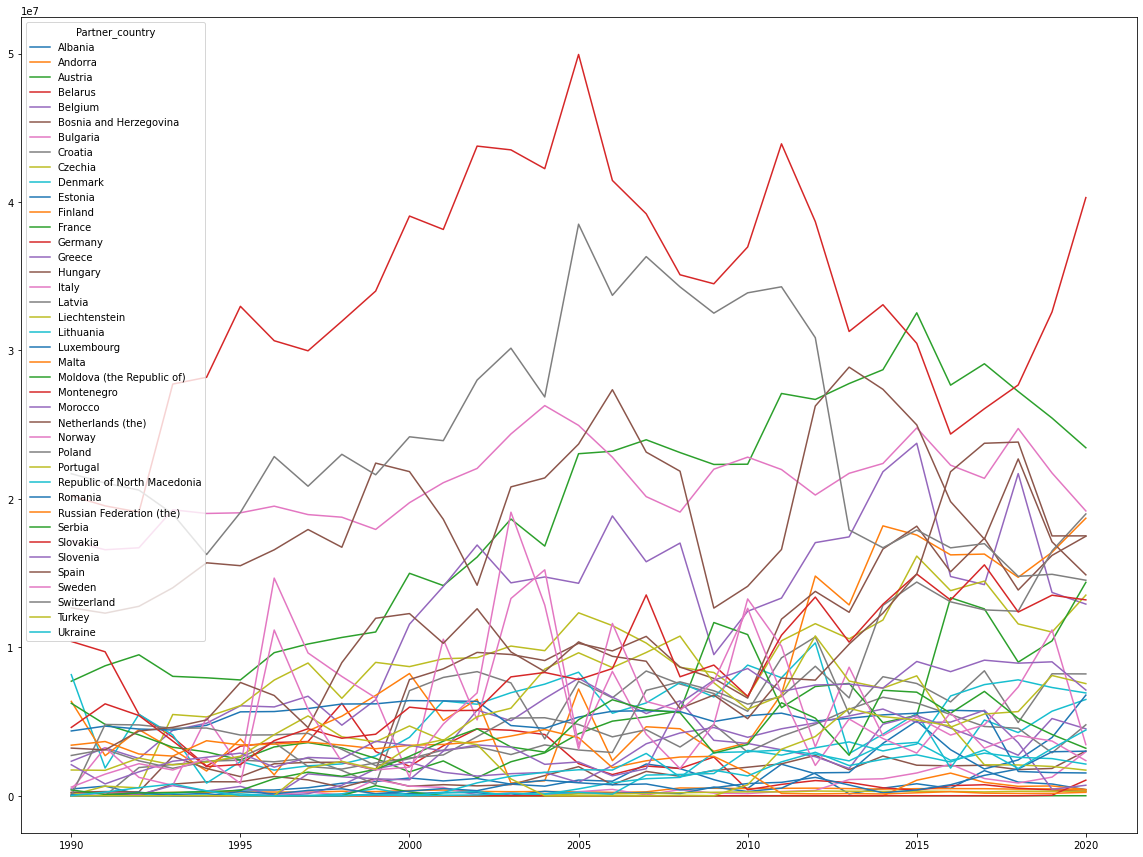

In [21]:
exports_grouped_by_partner.T.plot(figsize=(20,15));

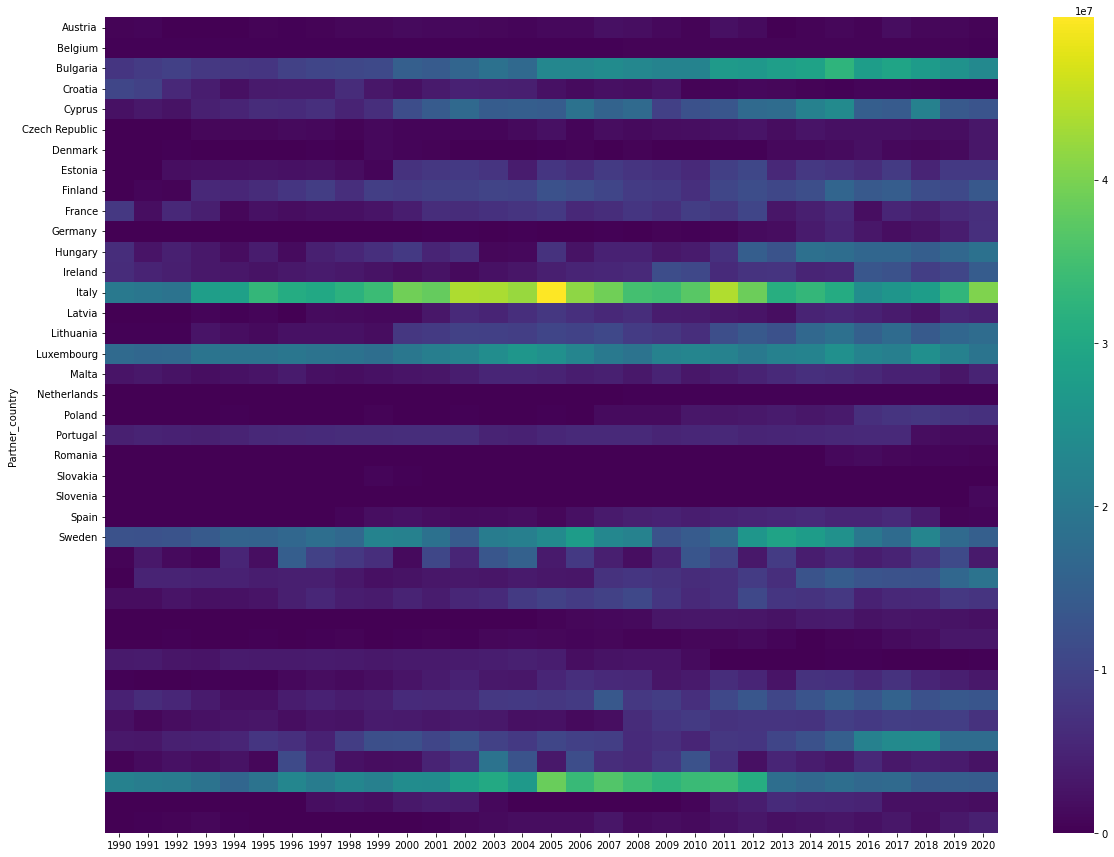

In [22]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(exports_grouped_by_partner.loc[:, '1990':'2020'], yticklabels=exports_grouped.index.values, cmap="viridis");

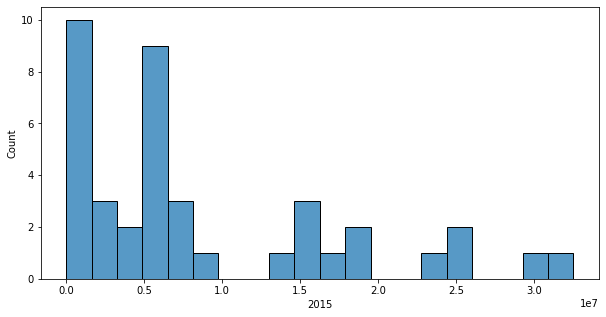

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(exports_grouped_by_partner['2015'], bins=20);